In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import pickle

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [31]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


**The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades**

In [33]:
df.shape

(571, 43)

In [34]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

* **Seat No :** The enrolled number of candidate that took the exams



* **CGPA :** The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

* **All other columns** are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

* **Predict**   CGPA of a student based on different grades in four years.

In [35]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

**All the columns are object data type which means all features are categorical in nature**

In [36]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

**There are many missing values in the dataset and it needs to be filled as our data is too small.Using Simple Immuter to fill the missing values**

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [38]:
# Using strategy as mode or most frequent to fill missing values
si = SimpleImputer(strategy = 'most_frequent')

In [39]:
ct = make_column_transformer((si,['CY-105', 'HS-105/12', 'MT-111',
        'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']),remainder='passthrough')

In [12]:
# Rename the columns and filling the missing values using Simple imputer and mode as a strategy and making a new dataframe

In [40]:
df_new = pd.DataFrame(ct.fit_transform(df),columns=['CY-105', 'HS-105/12', 'MT-111',
        'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412','Seat No.', 'PH-121', 'HS-101','CS-105', 'CGPA'])
df_new

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-406,CS-414,CS-419,CS-423,CS-412,Seat No.,PH-121,HS-101,CS-105,CGPA
0,C-,C,C-,D,C-,B-,C-,C-,B+,D,...,A-,A,C-,B,A-,CS-97001,B-,D+,D+,2.205
1,D+,D,B-,D,A,D+,D,B+,C+,B-,...,A-,B-,C,C,B,CS-97002,A,D,C,2.008
2,A,B-,B+,B-,B+,A-,A-,B-,A-,A,...,A,A,A,A-,A,CS-97003,A,B,A,3.608
3,D+,D,D,D+,C-,D,C+,D,B,D+,...,B-,B,C+,C+,C+,CS-97004,D,C+,A-,1.906
4,A-,B+,A,A-,B+,A,A-,C,A,A,...,A-,A,A-,A-,A,CS-97005,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,A,A-,A+,A-,A-,A+,B+,A+,A,A+,...,A,B+,B+,B,A,CS-97567,B,A,A,3.798
567,A,A,A,A,A-,A,A,A+,B+,C+,...,A-,B,A-,C,A-,CS-97568,A+,A,A,3.772
568,A-,B+,A,A,A,A,B,A+,B-,B,...,A,C,B+,A-,A-,CS-97569,B,A,A,3.47
569,D,A,D,B-,C-,B-,C-,A+,C+,D,...,D,C,B,B-,C,CS-97570,A,B+,D+,2.193


In [41]:
df_new['CY-105'].value_counts()

A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

In [42]:
# Dropping the nominal column as it is unique number and does not considered as an important attribute in predicting CGPA

df_new = df_new.drop('Seat No.',axis=1)
df_new.head()

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,PH-121,HS-101,CS-105,CGPA
0,C-,C,C-,D,C-,B-,C-,C-,B+,D,...,C-,A-,A,C-,B,A-,B-,D+,D+,2.205
1,D+,D,B-,D,A,D+,D,B+,C+,B-,...,D,A-,B-,C,C,B,A,D,C,2.008
2,A,B-,B+,B-,B+,A-,A-,B-,A-,A,...,C,A,A,A,A-,A,A,B,A,3.608
3,D+,D,D,D+,C-,D,C+,D,B,D+,...,C-,B-,B,C+,C+,C+,D,C+,A-,1.906
4,A-,B+,A,A-,B+,A,A-,C,A,A,...,B-,A-,A,A-,A-,A,A-,A-,A,3.448


In [22]:
df_new.isnull().sum()

CY-105       0
HS-105/12    0
MT-111       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
PH-121       0
HS-101       0
CS-105       0
CGPA         0
dtype: int64

In [43]:
df_new.nunique()

CY-105        13
HS-105/12     13
MT-111        13
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
PH-121        13
HS-101        12
CS-105        11
CGPA         491
dtype: int64

In [44]:
grades = ['CY-105', 'HS-105/12', 'MT-111',
        'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412','PH-121', 'HS-101','CS-105',]

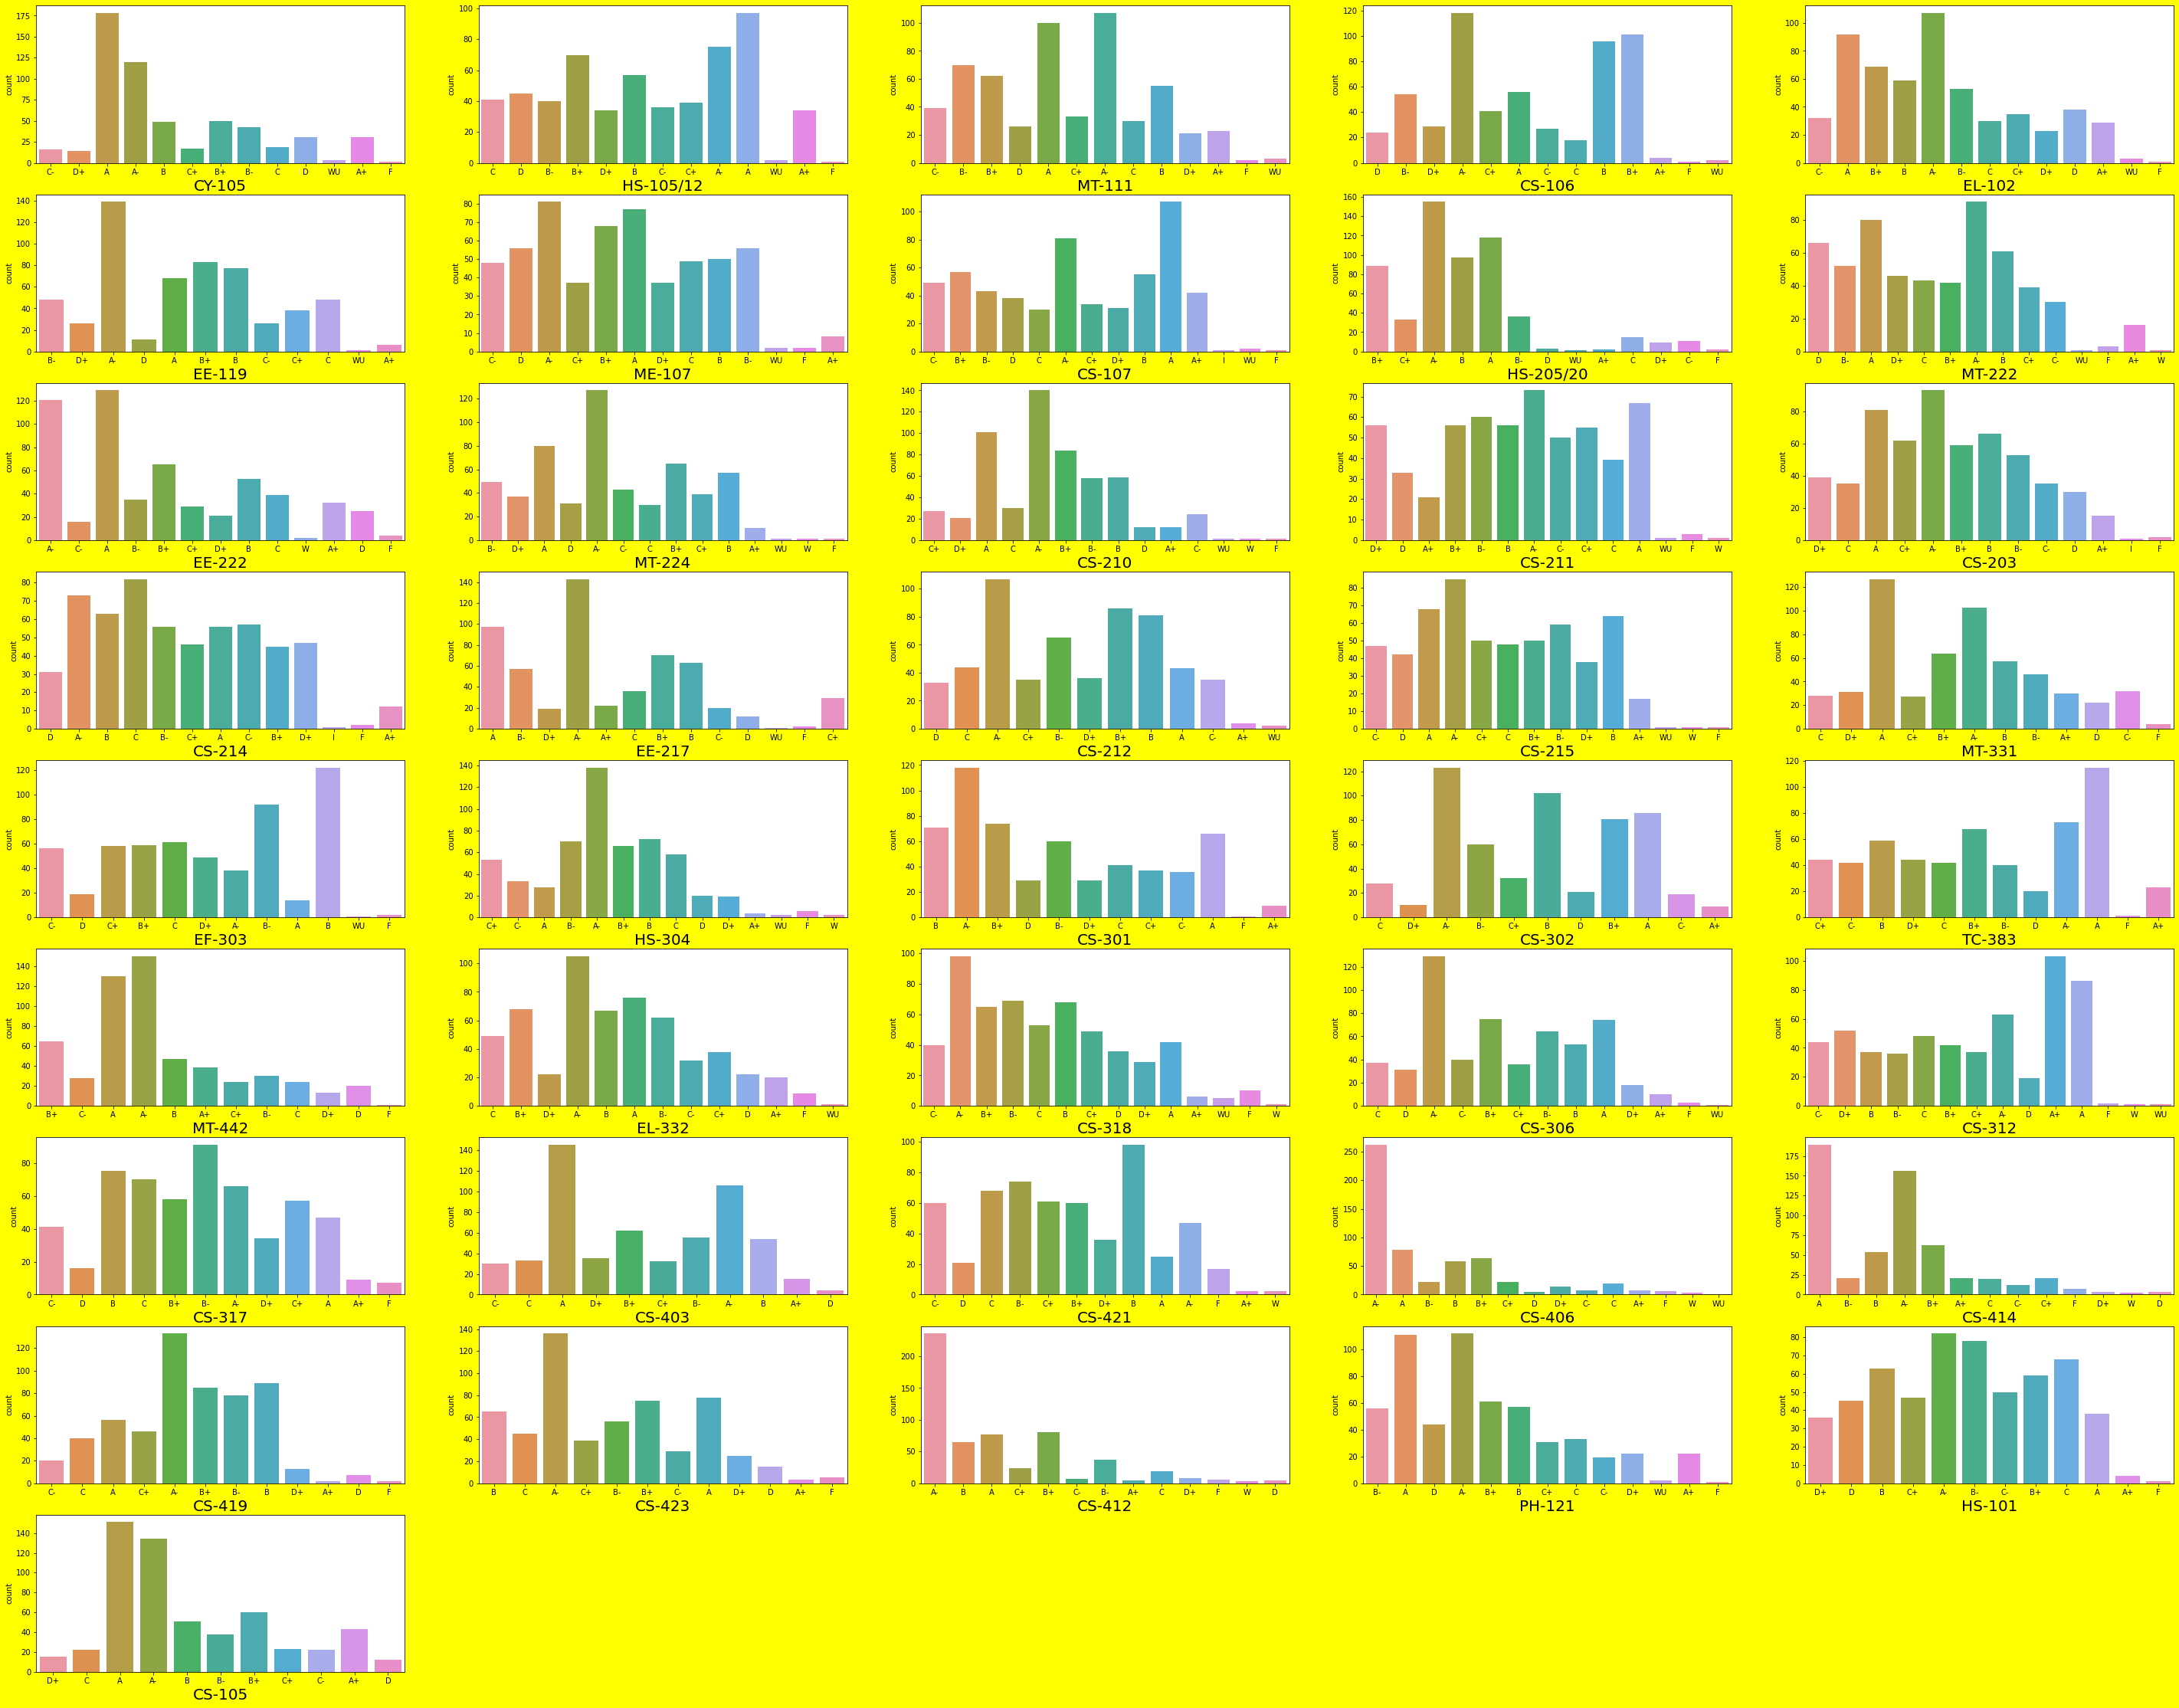

In [45]:
plt.figure(figsize=(50,40),facecolor='yellow')
plotnumber=1

for column in grades:
    if plotnumber<=41:
        ax = plt.subplot(9,5,plotnumber)
        sns.countplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

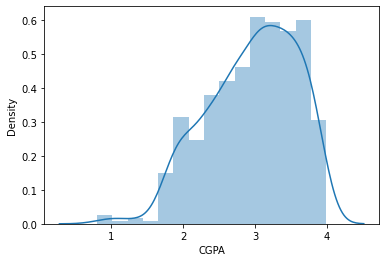

In [46]:
sns.distplot(df_new['CGPA'])

**Data distribution of CGPA (target variable) looks negatively skewed**

In [47]:
# Checking skewness in the target variable data
df_new['CGPA'].skew()

-0.4972033185635791

In [48]:
# Checking all the grades available in one of the feature column to help in encoding categories

df_new['CY-105'].value_counts()

A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

**Academic grading in the United States commonly takes on the form of five, six or seven letter grades. Traditionally, the grades are A+, A, A−, B+, B, B−, C+, C, C−, D+, D, D− and F, with A+ being the highest and F being lowest.**

In [49]:
df_new.columns

Index(['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
       'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
       'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318',
       'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414',
       'CS-419', 'CS-423', 'CS-412', 'PH-121', 'HS-101', 'CS-105', 'CGPA'],
      dtype='object')

In [50]:
df_new.dtypes

CY-105       object
HS-105/12    object
MT-111       object
CS-106       object
EL-102       object
EE-119       object
ME-107       object
CS-107       object
HS-205/20    object
MT-222       object
EE-222       object
MT-224       object
CS-210       object
CS-211       object
CS-203       object
CS-214       object
EE-217       object
CS-212       object
CS-215       object
MT-331       object
EF-303       object
HS-304       object
CS-301       object
CS-302       object
TC-383       object
MT-442       object
EL-332       object
CS-318       object
CS-306       object
CS-312       object
CS-317       object
CS-403       object
CS-421       object
CS-406       object
CS-414       object
CS-419       object
CS-423       object
CS-412       object
PH-121       object
HS-101       object
CS-105       object
CGPA         object
dtype: object

In [51]:
df_new['CGPA'].nunique

<bound method IndexOpsMixin.nunique of 0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568     3.47
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: object>

**Our target variable 'CGPA' is an object datatype but the values in the columns are float type. Need to change its data type to float**

In [52]:
# Converting data type of CGPA into float

df_new['CGPA'] = df_new['CGPA'].astype(float)

# Encoding the categorical columns using Ordinal Encoder

In [55]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [56]:
for i in df_new.columns:
    if df_new[i].dtypes == "object":
        df_new[i] = ord_enc.fit_transform(df_new[i].values.reshape(-1,1))

In [57]:
df_new.head()

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,PH-121,HS-101,CS-105,CGPA
0,5.0,6.0,5.0,3.0,5.0,8.0,5.0,5.0,10.0,9.0,...,8.0,2.0,0.0,8.0,3.0,2.0,5.0,10.0,10.0,2.205
1,4.0,3.0,8.0,3.0,12.0,4.0,3.0,10.0,7.0,5.0,...,9.0,2.0,5.0,6.0,6.0,3.0,0.0,9.0,6.0,2.008
2,12.0,8.0,10.0,8.0,10.0,11.0,11.0,8.0,11.0,0.0,...,6.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,3.608
3,4.0,3.0,3.0,4.0,5.0,3.0,7.0,3.0,9.0,10.0,...,8.0,5.0,3.0,7.0,7.0,7.0,9.0,7.0,2.0,1.906
4,11.0,10.0,12.0,11.0,10.0,12.0,11.0,6.0,12.0,0.0,...,5.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,3.448


In [58]:
X = df_new.drop('CGPA',axis=1)
y = df_new['CGPA']

# Best Random State

In [59]:
maxR2score = 0 # Max R2 score
maxRS = 0   # Best random state for which maximum r2 score is achieved

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    
    lr = LinearRegression()
    
    lr.fit(X_train,y_train)
    
    pred_lr = lr.predict(X_test)
   
    score_lr = r2_score(y_test,pred_lr)
    
    print("R2 Score: ",score_lr,"at random state", i)
   
    
    if score_lr>maxR2score:
   
        maxR2score = score_lr
              
        maxRS = i
        
        print("Maximum R2 Score:",maxR2score,"at random state ", maxRS)

R2 Score:  0.9514322012274093 at random state 1
Maximum R2 Score: 0.9514322012274093 at random state  1
R2 Score:  0.9418863181156014 at random state 2
R2 Score:  0.9446209471759685 at random state 3
R2 Score:  0.9448956255111141 at random state 4
R2 Score:  0.9230882673383377 at random state 5
R2 Score:  0.9612671950793665 at random state 6
Maximum R2 Score: 0.9612671950793665 at random state  6
R2 Score:  0.962402505030461 at random state 7
Maximum R2 Score: 0.962402505030461 at random state  7
R2 Score:  0.9228206994143274 at random state 8
R2 Score:  0.8474470943553678 at random state 9
R2 Score:  0.954736193937477 at random state 10
R2 Score:  0.7748052690829098 at random state 11
R2 Score:  0.9265269505650161 at random state 12
R2 Score:  0.9089781454551469 at random state 13
R2 Score:  0.7911760751765069 at random state 14
R2 Score:  0.8821780378696021 at random state 15
R2 Score:  0.8292077750967006 at random state 16
R2 Score:  0.8674476907041482 at random state 17
R2 Score:  

In [ ]:
#print("Best accuracy is ",maxAccu*100, "on random state", maxRS)
print("Best accuracy is ",maxR2score*100, "on random state", maxRS)

**The best random state comes to be 72 for which we are getting max R2 score as 97.30%**

# Linear Regression Model

In [60]:
lr = LinearRegression()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=72)

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("Training accuracy:",score_train*100)

print("Testing accuracy:",score_test*100)

Training accuracy: 92.3822025693054
Testing accuracy: 97.30141946879766


# Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

Training_accuracy = r2_score(y_train,pred_train)
Testing_accuracy = r2_score(y_test,pred_test)


for j in range(2,10):
    cv_score = cross_val_score(lr,X,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j}, the cv score is {cv_mean} and accuracy score for training is {Training_accuracy} and accuracy for testing is {Testing_accuracy}")
    print("/n")

At cross fold 2, the cv score is 0.8269433017340846 and accuracy score for training is 0.923822025693054 and accuracy for testing is 0.9730141946879767
/n
At cross fold 3, the cv score is 0.8875205304955607 and accuracy score for training is 0.923822025693054 and accuracy for testing is 0.9730141946879767
/n
At cross fold 4, the cv score is 0.8455716904432227 and accuracy score for training is 0.923822025693054 and accuracy for testing is 0.9730141946879767
/n
At cross fold 5, the cv score is 0.9069580961055095 and accuracy score for training is 0.923822025693054 and accuracy for testing is 0.9730141946879767
/n
At cross fold 6, the cv score is 0.9083304032338706 and accuracy score for training is 0.923822025693054 and accuracy for testing is 0.9730141946879767
/n
At cross fold 7, the cv score is 0.9052747515460299 and accuracy score for training is 0.923822025693054 and accuracy for testing is 0.9730141946879767
/n
At cross fold 8, the cv score is 0.9059976927943376 and accuracy score

**At cv = 9, we are getting best cv score as 91.08%**

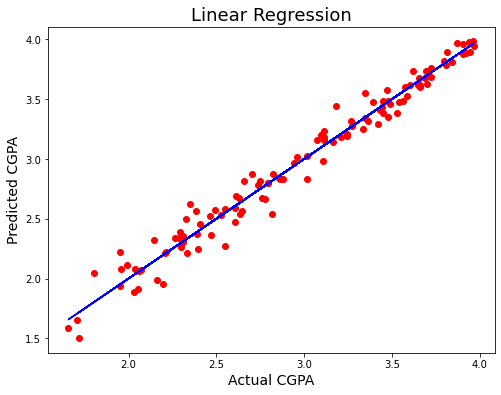

In [62]:
# Plotting Predicted vs Actual CGPA
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color ='r')
plt.plot(y_test,y_test,color ='b')
plt.xlabel('Actual CGPA',fontsize = 14)
plt.ylabel('Predicted CGPA',fontsize =14)
plt.title('Linear Regression',fontsize = 18)
plt.show()

# Model Evaluation using RMSE

In [63]:
# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

Root mean squared Error: 0.10412323714730384


# Lasso Regularization

In [64]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [65]:
#LassoCV will return best alpha after max iteration


lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)

lasscv.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [66]:
#Best alpha parameter
alpha = lasscv.alpha_
alpha

0.00043704795146790276

In [67]:
lasso_reg =Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.00043704795146790276)

In [68]:
pred_test = lasso_reg.predict(X_test)

print(lasso_reg.score(X_test,y_test)*100)

97.33063784076208


# Ridge Regularization

In [69]:
ridgecv = RidgeCV(alphas= np.arange(.001,0.1,.01),normalize = True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [70]:
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [71]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [72]:
pred_test = ridge_reg.predict(X_test)

print(ridge_reg.score(X_test,y_test)*100)

97.30166308240838


**We got around same R2 score using Lasso and ridge regression. So it's safe to say that there is no overfitting.**

# Ensemble technique - Random Forest

In [73]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_test = rf.predict(X_test)

rfs = r2_score(y_test,pred_test)

print("R2 score for Random Forest Model:",rfs*100)

rf_score = cross_val_score(rf,X,y,cv=9)

rfc = rf_score.mean()

print("Cross val score for Random Forest model:",rfc*100)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest model:",rmse)

R2 score for Random Forest Model: 94.78459234352992
Cross val score for Random Forest model: 90.95029677003527
Root mean squared Error for Random Forest model: 0.1447518424813277


# Hyperparameter Tuning - For Random Forest

In [74]:
# For Random Forest Regressor

params_rf = {'criterion':['mse','mae'],
             'min_samples_split':range(4,9),
             'max_features':['auto','sqrt','log2'],
             'max_samples':(0.1,0.2,0.25)}

grd_rf = GridSearchCV(rf,params_rf)

grd_rf.fit(X_train,y_train)

print(grd_rf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'max_samples': 0.25, 'min_samples_split': 4}


In [75]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_test = rf.predict(X_test)

rfs = r2_score(y_test,pred_test)

print("R2 score for Random Forest Model after tuning:",rfs*100)

rf_score = cross_val_score(rf,X,y,cv=9)

rfc = rf_score.mean()

print("Cross val score for Random Forest model after tuning:",rfc*100)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest model after tuning:",rmse)

R2 score for Random Forest Model after tuning: 95.60723897171755
Cross val score for Random Forest model after tuning: 89.1081653945339
Root mean squared Error for Random Forest model after tuning: 0.13284608467560732


# Ada BoostRegressor

In [76]:
from sklearn import metrics

ada = AdaBoostRegressor()

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for Ada Boost regressor: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor: ", acc_test)

ada_score = cross_val_score(ada,X,y,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresor:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor:",rmse)

R square score for training dataset for Ada Boost regressor:  0.9362984370682212
R square score for test dataset for Ada Boost Regressor:  0.9147457452107461
Cross val score for Ada Boost Regresor: 86.95043474666619
Root mean squared Error for ada boost Regressor: 0.18507084230043636


# Hyperparameter Tuning- Ada Boost Regressor

In [77]:
params_ada = {'n_estimators': [48,49,51,53,60],
              'learning_rate':[0.90,0.85,0.30,0.95,1.0],
              'loss' :['linear', 'square', 'exponential']
             }

grd_ada = GridSearchCV(ada,params_ada)

grd_ada.fit(X_train,y_train)

print(grd_ada.best_params_)

{'learning_rate': 0.9, 'loss': 'linear', 'n_estimators': 60}


In [78]:
ada = grd_ada.best_estimator_

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for Ada Boost regressor after tuning: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor after tuning: ", acc_test)

ada_score = cross_val_score(ada,X,y,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresora after tuning:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor after tuning:",rmse)

R square score for training dataset for Ada Boost regressor after tuning:  0.9311733099092447
R square score for test dataset for Ada Boost Regressor after tuning:  0.9064943716990783
Cross val score for Ada Boost Regresora after tuning: 86.26298064668978
Root mean squared Error for ada boost Regressor after tuning: 0.19382011487690046


# K Neighbors Regressor

In [79]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for K Neighbors regressor: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for K Neighbors Regressor: ", acc_test)

knn_score = cross_val_score(knn,X,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor:",rmse)

R square score for training dataset for K Neighbors regressor:  0.9203325100923458
R square score for test dataset for K Neighbors Regressor:  0.9732721562762775
Cross val score for K Neighbors Regresor: 89.34183740582655
Root mean squared Error for K Neighbors Regressor: 0.10362437685342608


# Hyperparameter Tuning - K Neighbors Regressor

In [80]:
# Hyperparameter tuning for K Neighbors Regressor

params_knn = {'n_neighbors':[4,5,6,7,8],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'n_jobs':[-1,1]
             }

grd_knn = GridSearchCV(knn,params_knn)

grd_knn.fit(X_train,y_train)

print(grd_knn.best_params_)

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'uniform'}


In [81]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for K Neighbors regressor after tuning: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for K Neighbors Regressor after tuning: ", acc_test)

knn_score = cross_val_score(knn,X,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor after tuning:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor after tuning:",rmse)

R square score for training dataset for K Neighbors regressor after tuning:  0.9261469052451445
R square score for test dataset for K Neighbors Regressor after tuning:  0.9744404269619881
Cross val score for K Neighbors Regresor after tuning: 89.19845853545226
Root mean squared Error for K Neighbors Regressor after tuning: 0.10133436903551571


# Support Vector Regressor (SVR)

In [82]:
svr = SVR()

svr.fit(X_train,y_train)

pred_train = svr.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for SVR: ", acc_train)

pred_test = svr.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for SVR: ", acc_test)

svr_score = cross_val_score(svr,X,y,cv=5)

svr_m = svr_score.mean()

print("Cross val score for SVR:",svr_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for SVR:",rmse)

R square score for training dataset for SVR:  0.9549341266031419
R square score for test dataset for SVR:  0.983328330510335
Cross val score for SVR: 92.02645037147299
Root mean squared Error for SVR: 0.08184073409200668


# Hyperparameter Tuning - SVR

In [83]:
# Hyperparameter tuning for Support Vector Regressor

params_svr = {'kernel':['linear', 'rbf', 'sigmoid'],
              'gamma':['scale','auto']
             }

grd_svr = GridSearchCV(svr,params_svr)

grd_svr.fit(X_train,y_train)

print(grd_svr.best_params_)

{'gamma': 'scale', 'kernel': 'rbf'}


In [84]:
svr = grd_svr.best_estimator_

svr.fit(X_train,y_train)

pred_train = svr.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for SVR after tuning: ", acc_train)

pred_test = svr.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for SVR after tuning: ", acc_test)

svr_score = cross_val_score(svr,X,y,cv=5)

svr_m = svr_score.mean()

print("Cross val score for SVR after tuning:",svr_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for SVR after tuning:",rmse)

R square score for training dataset for SVR after tuning:  0.9549341266031419
R square score for test dataset for SVR after tuning:  0.983328330510335
Cross val score for SVR after tuning: 92.02645037147299
Root mean squared Error for SVR after tuning: 0.08184073409200668


**Among all the models, the best r2 score and cv score is given by Support Vector Regressor Model**

# Saving the model

In [85]:
filename = 'grade_student.pkl'
pickle.dump(svr,open(filename,'wb'))

# Conclusion

In [86]:
loaded_model = pickle.load(open('grade_student.pkl','rb'))
result = loaded_model.score(X_test,y_test)
pred_test = loaded_model.predict(X_test)
print(result*100,'%')

98.3328330510335 %


In [87]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

In [88]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
Predicted,2.206743,3.492185,3.225327,2.383438,2.352144,3.633092,3.328477,3.835703,3.365404,3.841148,...,1.834177,2.904761,3.243662,3.702329,3.458434,3.154805,2.345622,2.01309,2.449091,3.635709
Original,2.288000,3.566000,3.114000,2.384000,2.311000,3.700000,3.350000,3.943000,3.443000,3.908000,...,1.658000,3.019000,3.334000,3.574000,3.432000,3.208000,2.396000,2.06000,2.407000,3.659000
